# Классификация изображений

## Задача классификации

<b>Задача классификации изображений</b> – это базовая задача, которая относится к области компьютерного зрения.

Пусть дано множество классов (меток), например, {кот, собака, грузовик, самолёт, катер, …} и дано изображение некоторого объекта. Необходимо отнести это изображение к одному классу из заданных

<img src="images_cls/classify.svg" alt="Image classification" style="width: 800px; height: 400px;">

Задача классификации - это задача обучения с учителем, поэтому нам понадобятся размеченные данные.

## Простой пример

<b>Введение.</b> Рассмотрим простой вариант решения задачи классификации изображений на примере набора данных Fashion-MNIST. Этот набор данных является неплохой альтернативой набору MNIST (который уже всем надоел). Изображения из этого набора представляют собой фото различных элементов одежды, таким образом мы молучаем большую вариативность внутри каждого класса.

<img src="images_cls/fashion-mnist-sprite.png" alt="Fashion-MNIST preview" style="width: 600px; height: 600px;">

<center>Рис. Предпросмотр набора данных Fashion-MNIST</center>

In [58]:
# Импорты нужных нам библиотек и фреймворков
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

print(tf.__version__)

2.6.0


In [46]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['Футболка/топ', 'Брюки', 'Пуловер', 'Платье', 'Пальто',
               'Сандалии', 'Рубаха', 'Кроссовки', 'Сумка', 'Полуботинки']

Посмотрим на характеристики набора данных

In [47]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


Каждое индивидуальное изображение должно быть полутоновым. Убедимся на примере, что изображения имеют размер 28x28, а значения интенсивности пикселей попадают в диапазон 0..255

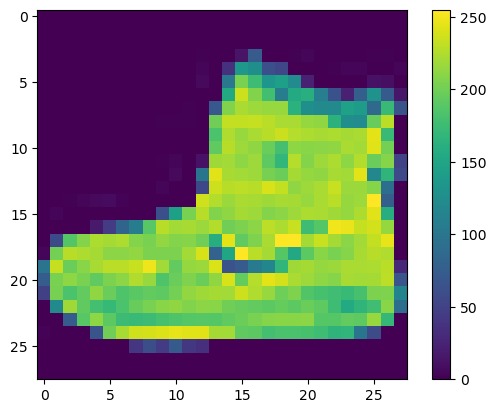

In [48]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

# Посмотрели - теперь приведём яркости к диапазону 0..1
train_images = train_images / 255.0
test_images = test_images / 255.0

Посмотрим на образцы

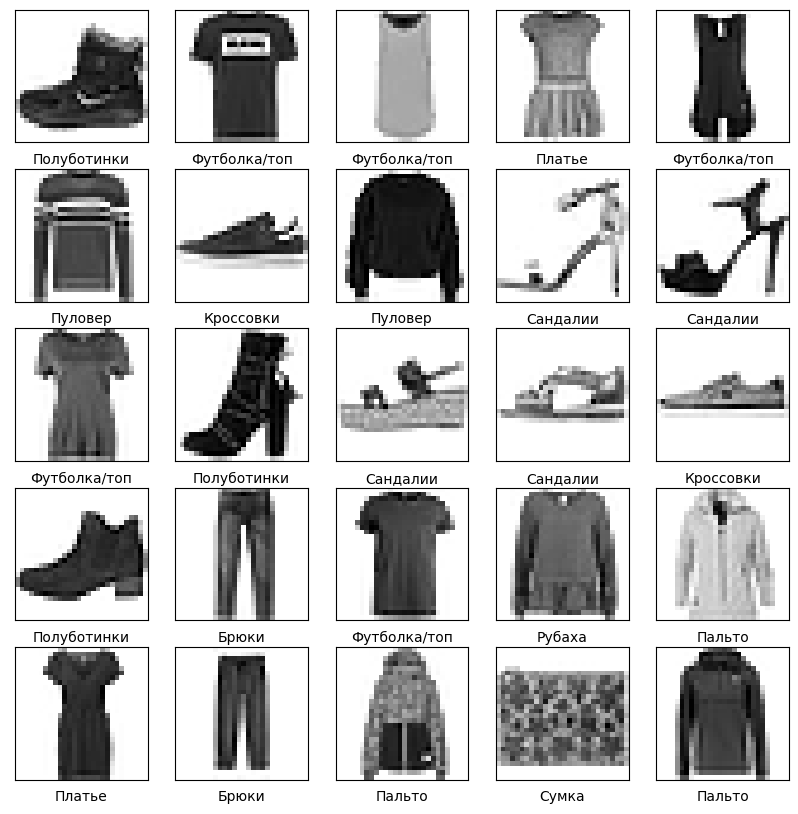

In [49]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

Соберём простую модель. Раз изображения - сразу на свёрточных сетях.

In [50]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

Компилируем модель

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

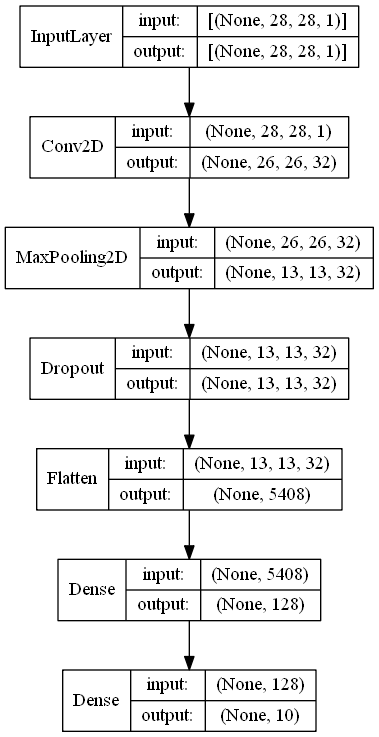

In [51]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.summary()
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=False)

Обучим нашу сеть

In [52]:
train_images = np.expand_dims(train_images, -1)
test_images = np.expand_dims(test_images, -1)
history = model.fit(train_images, train_labels, batch_size=256, epochs=10,validation_split=0.2,verbose=1)

Epoch 1/10
188/188 [==============================] - 3s 14ms/step - loss: 0.5325 - accuracy: 0.8139 - val_loss: 0.3710 - val_accuracy: 0.8695
Epoch 2/10
188/188 [==============================] - 2s 11ms/step - loss: 0.3461 - accuracy: 0.8777 - val_loss: 0.3169 - val_accuracy: 0.8887
Epoch 3/10
188/188 [==============================] - 2s 11ms/step - loss: 0.3002 - accuracy: 0.8931 - val_loss: 0.2958 - val_accuracy: 0.8971
Epoch 4/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2793 - accuracy: 0.9007 - val_loss: 0.2885 - val_accuracy: 0.8982
Epoch 5/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2576 - accuracy: 0.9073 - val_loss: 0.2706 - val_accuracy: 0.9038
Epoch 6/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2428 - accuracy: 0.9120 - val_loss: 0.2595 - val_accuracy: 0.9070
Epoch 7/10
188/188 [==============================] - 2s 11ms/step - loss: 0.2305 - accuracy: 0.9162 - val_loss: 0.2534 - val_accuracy: 0.9113

In [57]:
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)
print(classification_report(test_labels, predicted_classes, target_names=class_names))

              precision    recall  f1-score   support

Футболка/топ       0.86      0.87      0.87      1000
       Брюки       0.99      0.98      0.98      1000
     Пуловер       0.84      0.87      0.86      1000
      Платье       0.89      0.93      0.91      1000
      Пальто       0.87      0.85      0.86      1000
    Сандалии       0.98      0.98      0.98      1000
      Рубаха       0.77      0.71      0.74      1000
   Кроссовки       0.95      0.97      0.96      1000
       Сумка       0.96      0.98      0.97      1000
 Полуботинки       0.97      0.95      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



Проанализируем ошибки.

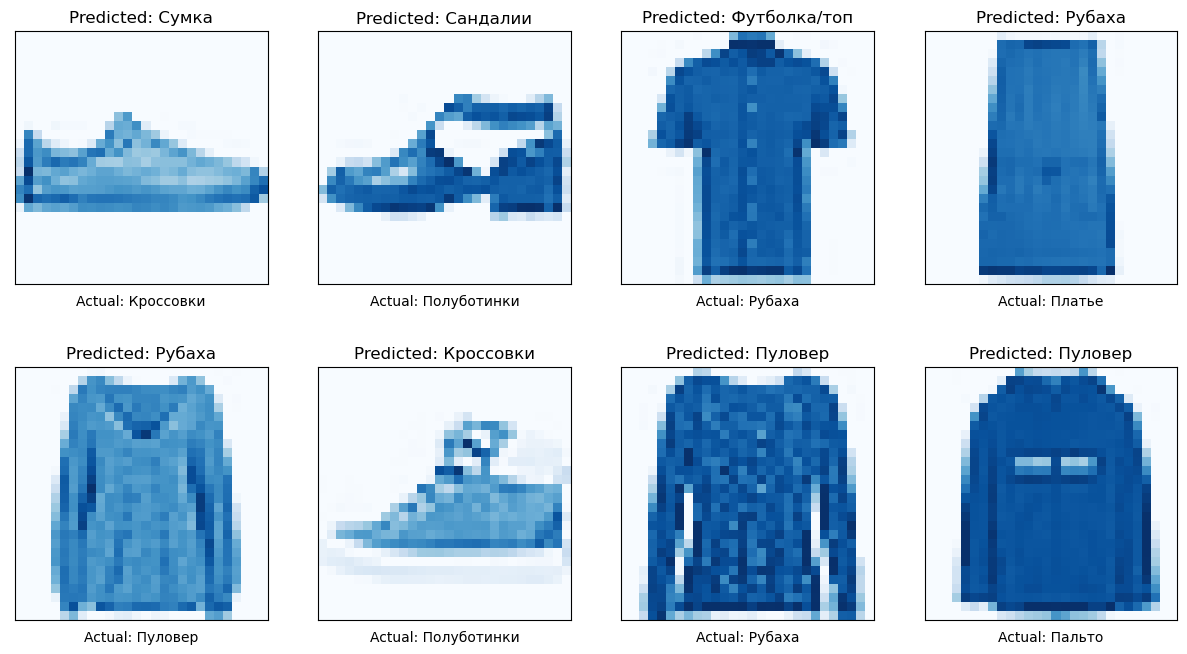

In [64]:
incorrect = np.nonzero(predicted_classes!=test_labels)[0]
plt.figure(figsize=(15, 8))
for j, incorrect in enumerate(incorrect[0:8]):
    plt.subplot(2, 4, j+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[incorrect].reshape(28, 28), cmap="Blues")
    plt.title("Predicted: {}".format(class_names[predicted_classes[incorrect]]))
    plt.xlabel("Actual: {}".format(class_names[test_labels[incorrect]]))

## Подготовка своего набора данных.

Набор данных для решения задачи классификации, как правило, имеет определённую структуру. При этом фреймворк TensorFlow и API Keras предполагают, что данные изображений будут предъявляться на вход модели в определённой структуре. Её примерный вид показан ниже на рис.

<img src="images_cls/dataset.png" alt="Image classification" style="width: 800px; height: 400px;">

Как видно из рисунка, предполагается, что для каждого класса будет создана директория, которая и будет содержать изображения объектов, которые относятся к ней.

## Классифицирующая модель.

## Дополнение данных (обогащение, аугментация).